In [1]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
maindir = "./" # Directory with your files
traincsv = maindir+"/hdl_low_std.csv"
testcsv = maindir+"/Final_Test.csv"

In [3]:
train = pd.read_csv(traincsv)
train.head()

,donation_id,hdl_cholesterol_human,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,1975,low,0.505055,0.506570,0.511544,0.516300,0.524067,0.530191,0.536138,0.542317,...,1.410468,1.409675,1.401169,1.395687,1.390813,1.384304,1.395545,1.369307,42.332500,37.773000
1,1982,low,0.523531,0.523485,0.526291,0.532875,0.538397,0.543180,0.547520,0.553433,...,1.298688,1.301346,1.299807,1.299004,1.298251,1.297575,1.302398,1.284716,39.385167,43.316667
2,1989,low,0.516449,0.519226,0.523619,0.532366,0.540438,0.547985,0.552716,0.556823,...,1.283621,1.272086,1.247736,1.228340,1.211511,1.204599,1.212862,1.193458,42.455500,46.535167
3,1994,low,0.512397,0.514371,0.518486,0.520868,0.526911,0.534963,0.542428,0.549013,...,1.268378,1.262765,1.254238,1.246901,1.248287,1.245556,1.266079,1.258333,45.173333,37.369333
4,2002,low,0.496008,0.496698,0.499643,0.502549,0.506363,0.511604,0.518730,0.523823,...,1.201238,1.196827,1.196379,1.197037,1.195206,1.199005,1.222712,1.213309,45.523667,38.557500


In [4]:
train.isnull().values.any()

False

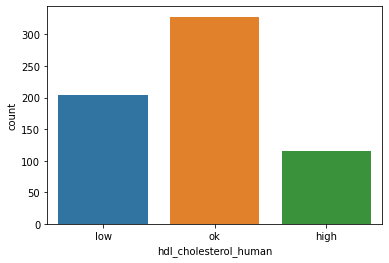

In [5]:
sns.countplot(train["hdl_cholesterol_human"])

In [6]:
train.drop(["donation_id"], axis=1, inplace=True)


In [7]:
train.head()

,hdl_cholesterol_human,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,low,0.505055,0.506570,0.511544,0.516300,0.524067,0.530191,0.536138,0.542317,0.551118,...,1.410468,1.409675,1.401169,1.395687,1.390813,1.384304,1.395545,1.369307,42.332500,37.773000
1,low,0.523531,0.523485,0.526291,0.532875,0.538397,0.543180,0.547520,0.553433,0.561674,...,1.298688,1.301346,1.299807,1.299004,1.298251,1.297575,1.302398,1.284716,39.385167,43.316667
2,low,0.516449,0.519226,0.523619,0.532366,0.540438,0.547985,0.552716,0.556823,0.561827,...,1.283621,1.272086,1.247736,1.228340,1.211511,1.204599,1.212862,1.193458,42.455500,46.535167
3,low,0.512397,0.514371,0.518486,0.520868,0.526911,0.534963,0.542428,0.549013,0.556389,...,1.268378,1.262765,1.254238,1.246901,1.248287,1.245556,1.266079,1.258333,45.173333,37.369333
4,low,0.496008,0.496698,0.499643,0.502549,0.506363,0.511604,0.518730,0.523823,0.530309,...,1.201238,1.196827,1.196379,1.197037,1.195206,1.199005,1.222712,1.213309,45.523667,38.557500


In [8]:
fdata =train.iloc[:,1:]

In [9]:
fdata

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,0.505055,0.506570,0.511544,0.516300,0.524067,0.530191,0.536138,0.542317,0.551118,0.567411,...,1.410468,1.409675,1.401169,1.395687,1.390813,1.384304,1.395545,1.369307,42.332500,37.773000
1,0.523531,0.523485,0.526291,0.532875,0.538397,0.543180,0.547520,0.553433,0.561674,0.575610,...,1.298688,1.301346,1.299807,1.299004,1.298251,1.297575,1.302398,1.284716,39.385167,43.316667
2,0.516449,0.519226,0.523619,0.532366,0.540438,0.547985,0.552716,0.556823,0.561827,0.575226,...,1.283621,1.272086,1.247736,1.228340,1.211511,1.204599,1.212862,1.193458,42.455500,46.535167
3,0.512397,0.514371,0.518486,0.520868,0.526911,0.534963,0.542428,0.549013,0.556389,0.567360,...,1.268378,1.262765,1.254238,1.246901,1.248287,1.245556,1.266079,1.258333,45.173333,37.369333
4,0.496008,0.496698,0.499643,0.502549,0.506363,0.511604,0.518730,0.523823,0.530309,0.540033,...,1.201238,1.196827,1.196379,1.197037,1.195206,1.199005,1.222712,1.213309,45.523667,38.557500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.502509,0.505064,0.510711,0.515669,0.524011,0.531853,0.538477,0.543057,0.550667,0.560444,...,1.244470,1.233291,1.220283,1.200647,1.187133,1.183137,1.189466,1.189077,43.167167,40.711833
644,0.468249,0.470863,0.475919,0.480266,0.487362,0.494926,0.502229,0.508714,0.518487,0.530481,...,1.382733,1.382295,1.375308,1.369146,1.363165,1.364126,1.388292,1.381528,41.137667,44.372500
645,0.510297,0.514466,0.518533,0.523982,0.531143,0.538819,0.543066,0.547491,0.553561,0.563388,...,1.270319,1.256941,1.239707,1.217719,1.206419,1.198159,1.216766,1.213557,43.937333,47.433833
646,0.519933,0.524163,0.528858,0.534626,0.542349,0.550879,0.555232,0.559932,0.565824,0.576167,...,1.335579,1.319962,1.303621,1.275118,1.256514,1.256137,1.272842,1.260732,45.642333,44.814167


In [10]:
fdata = fdata.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [11]:
data = train.to_numpy()

print(data.shape) # 219 IDs

(648, 173)


In [12]:
ffdata = fdata.to_numpy()

In [13]:
features = ffdata
labels = data[:, 0]

In [14]:
fdata

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,0.018706,0.003823,0.014508,0.013479,0.025784,0.016804,0.010916,0.018650,0.024052,0.062064,...,0.995718,1.025898,0.949217,0.949110,0.897170,0.834922,0.787437,0.826551,0.429268,0.234260
1,0.155956,0.172387,0.169199,0.157155,0.151075,0.132838,0.123319,0.122432,0.124296,0.138762,...,0.086942,0.147210,0.186330,0.232557,0.255645,0.259347,0.193227,0.182933,-0.643726,0.898043
2,0.103349,0.129940,0.141171,0.152741,0.168914,0.175766,0.174635,0.154080,0.125753,0.135172,...,-0.035554,-0.090132,-0.205570,-0.291166,-0.345527,-0.357680,-0.377947,-0.511422,0.474047,1.283417
3,0.073247,0.081563,0.087321,0.053072,0.050653,0.059433,0.073027,0.081163,0.074113,0.061589,...,-0.159487,-0.165734,-0.156633,-0.153602,-0.090641,-0.085872,-0.038462,-0.017807,1.463490,0.185926
4,-0.048507,-0.094556,-0.110337,-0.105717,-0.128997,-0.149255,-0.161006,-0.154017,-0.173580,-0.194033,...,-0.705336,-0.700581,-0.592107,-0.523162,-0.458531,-0.394805,-0.315110,-0.360382,1.591031,0.328193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,-0.000206,-0.011190,0.005766,0.008011,0.025293,0.031648,0.034009,0.025560,0.019761,-0.003103,...,-0.353856,-0.404808,-0.412195,-0.496407,-0.514480,-0.500113,-0.527195,-0.544750,0.733133,0.586147
644,-0.254718,-0.352016,-0.359188,-0.298861,-0.295127,-0.298254,-0.323963,-0.295073,-0.285849,-0.283382,...,0.770226,0.803811,0.754582,0.752401,0.705544,0.701011,0.741169,0.919538,-0.005718,1.024465
645,0.057642,0.082510,0.087816,0.080065,0.087655,0.093884,0.079330,0.066955,0.047251,0.024439,...,-0.143700,-0.212973,-0.266003,-0.369877,-0.380817,-0.400423,-0.353037,-0.358494,1.013517,1.391021
646,0.129228,0.179140,0.196125,0.172333,0.185626,0.201626,0.199476,0.183106,0.163709,0.143968,...,0.386867,0.298208,0.215037,0.055524,-0.033620,-0.015654,0.004681,0.000442,1.634232,1.077349


In [15]:
test = pd.read_csv(testcsv)
test.head()

,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,ID_1961,0.499920,0.504608,0.507929,0.519943,0.529032,0.536118,0.539690,0.541710,0.548590,...,1.165124,1.140465,1.098607,1.065527,1.044592,1.035440,1.041868,1.027759,41.507000,40.839333
1,ID_2067,0.497758,0.498091,0.503083,0.507249,0.513739,0.521944,0.528798,0.533743,0.541470,...,1.221584,1.221688,1.221872,1.219100,1.221694,1.221569,1.233970,1.227104,42.656500,39.675167
2,ID_2155,0.551436,0.553079,0.556722,0.560722,0.565583,0.570889,0.578668,0.585142,0.594233,...,1.419018,1.422387,1.421566,1.422355,1.423502,1.433594,1.451166,1.433315,42.523833,41.728500
3,ID_2211,0.525926,0.528948,0.532222,0.540022,0.547279,0.554348,0.558680,0.563768,0.570031,...,1.264453,1.251708,1.234305,1.212873,1.203968,1.196735,1.201349,1.192471,40.505833,43.938667
4,ID_2327,0.559814,0.559612,0.561561,0.565162,0.567556,0.572362,0.579762,0.587761,0.599415,...,1.259556,1.266984,1.281871,1.294898,1.302489,1.304253,1.317566,1.295373,37.754333,24.961000


In [16]:
# save it ids before dropping them
idx = test.donation_id.values
test.drop(["donation_id"], axis=1, inplace=True)
#testdata = test.to_numpy()

In [17]:
test = test.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [18]:
test.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,-0.227418,-0.169176,-0.188461,-0.018954,0.048355,0.024320,-0.043472,-0.131668,-0.169203,-0.170479,...,-1.909890,-2.058211,-2.275455,-2.365354,-2.394615,-2.396306,-2.368629,-2.528512,0.345189,1.042240
1,-0.281898,-0.333015,-0.311034,-0.333865,-0.333306,-0.336205,-0.316825,-0.329475,-0.345757,-0.389152,...,-1.109906,-0.984204,-0.806468,-0.697263,-0.591208,-0.566007,-0.565295,-0.545724,0.843378,0.901858
2,1.070591,1.049555,1.045623,0.992717,0.960592,0.908734,0.934810,0.946743,0.962738,1.042140,...,1.687534,1.669642,1.573335,1.510477,1.463779,1.518951,1.473606,1.505371,0.785880,1.149460
3,0.427814,0.442821,0.425960,0.479177,0.503767,0.487998,0.433140,0.416039,0.362535,0.389382,...,-0.502494,-0.587242,-0.658299,-0.764895,-0.771711,-0.810205,-0.871524,-0.890197,-0.088712,1.415973
4,1.281669,1.213822,1.168023,1.102855,1.009828,0.946196,0.962264,1.011766,1.091246,1.185640,...,-0.571892,-0.385258,-0.091450,0.126047,0.231518,0.247071,0.219453,0.133322,-1.281201,-0.872451


In [19]:
testdata = test.to_numpy()

In [20]:
print(testdata.shape) # 61 Individuals

(61, 172)


In [21]:
labels_n = np.zeros(labels.shape)
labels_n[np.where(labels=='low')] = 0
labels_n[np.where(labels=='ok')] = 1
labels_n[np.where(labels=='high')] = 2

In [22]:
labels_n.shape

(648,)

In [24]:
labels_n= labels_n.reshape(648,1)

In [26]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.svm import SVC

In [27]:
n_samples, n_features = features.shape
n_outputs = labels_n.shape[1]
n_classes = 3
svc = SVC()
multi_target_forest = MultiOutputClassifier(svc, n_jobs=-1)
model = multi_target_forest.fit(features, labels_n)

In [28]:
multi_target_forest.score(features, labels_n)

0.5077160493827161

In [29]:
def mymodel(features):
    output = model.predict(features)
    return output

In [30]:
predictions = mymodel(testdata)

In [31]:
predictions.shape

(61, 1)

In [32]:
ss = pd.DataFrame()
ss["Reading_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions[:,0]

In [33]:
ss

,Reading_ID,hdl_cholesterol_human
0,ID_1961,1.0
1,ID_2067,1.0
2,ID_2155,1.0
3,ID_2211,1.0
4,ID_2327,1.0
...,...,...
56,ID_6373,1.0
57,ID_6381,1.0
58,ID_6391,1.0
59,ID_7755,1.0


In [34]:
def transform(value):
    if value == 0.0:
        return 'low'
    elif value == 1.0:
        return 'ok'
    else:
        return 'high'
        

In [35]:
ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x: transform(x))
#ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
#ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x: transform(x))

In [36]:
ss.head()

,Reading_ID,hdl_cholesterol_human
0,ID_1961,ok
1,ID_2067,ok
2,ID_2155,ok
3,ID_2211,ok
4,ID_2327,ok


In [37]:
def transform_c_hdl(row):
    return str(row["Reading_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

In [38]:
hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))

In [39]:
ss=hdl_rows

In [40]:
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])

In [41]:
ss = ss.rename(columns={0:"Reading_ID"})

In [42]:
ss.head()

,Reading_ID,target
0,ID_1961_hdl_cholesterol_human,ok
1,ID_2067_hdl_cholesterol_human,ok
2,ID_2155_hdl_cholesterol_human,ok
3,ID_2211_hdl_cholesterol_human,ok
4,ID_2327_hdl_cholesterol_human,ok


In [43]:
ss.shape

(61, 2)

In [44]:
ss.to_csv(maindir+"/hdl_svm.csv", index=False)